<a href="https://colab.research.google.com/github/Tower5954/Dog-vision/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐕 End-to-end Multi-class Dog Breed Classification 🐕

This notebook builds an end-to-end multi-class image classifier using 
Tensorflow 2.0 and Tensorflow Hub

## 1. Problem

Identifying the breed of dog given an image of a dog. 

## 2. Data

The data we are using is from Kaggle's dog breed identification competion.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of 
each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation


## 4. Features

Some information about the data:

* We are dealing with images (unstructured data), so it is probably best that 
we use deep learning/transfer learning.

* There are 120 breeds of dog( This means that there are 120 different classes). 

* There are 10,000 + images in the training set.
(These image have labels).

* There are 10,000 + images in the test set.
(These images do not have labels, as we will want to predict them.)


In [1]:
# Unzip the uploaded file into Google drive.
#!unzip "drive/My Drive/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision"

### Get our workspace ready

* Import Tensorflow 2.x 
* Import Tensorflow Hub
* Make sure that we are using a GPU 

In [2]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("Tensorflow version:", tf.__version__)
print("Tensorflow hub version:", hub.__version__)

# Check for GPU Availability 
print("GPU", "available(yes!)" if tf.config.list_physical_devices("GPU") else "Not available")

Tensorflow version: 2.6.0
Tensorflow hub version: 0.12.0
GPU available(yes!)


### Workspace ready
* Import Tensorflow 2.x ✔️
* Import Tensorflow Hub ✔️
* Make sure that we are using a GPU ✔️

## Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numerical form. So we will turn our images into Tensors (numerical representation).

We will start by accessing our data and checking our labels.

### Check out our data

In [3]:
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     61fab186c726e3f0ac1965c0e38d4a0f  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


## How many images are there per breed 

In [4]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

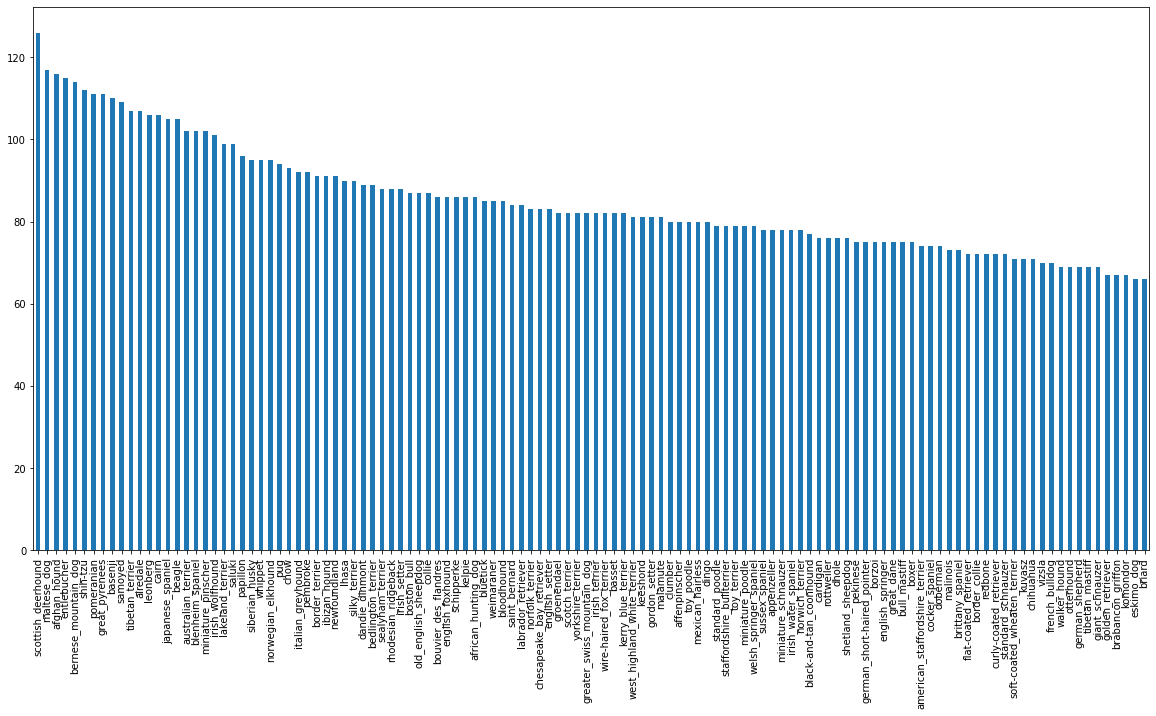

In [5]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [6]:
labels_csv["breed"].value_counts().median()

82.0

### To view an image

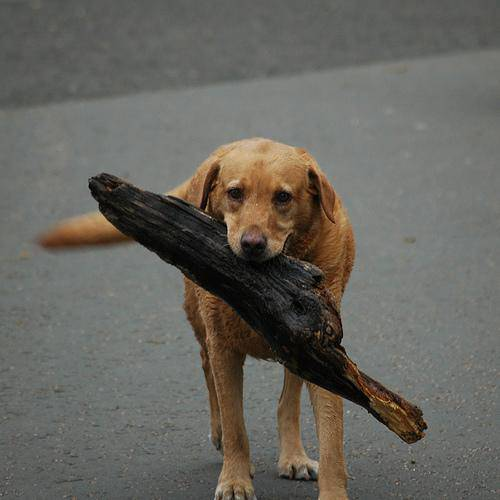

In [7]:
from IPython.display import Image

Image("drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg")

### Getting Images and their labels

To get a list of all our image file pathnames.

In [8]:
labels_csv.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [9]:
# Create pathname from images IDs

filenames = ["drive/MyDrive/Dog Vision/train/" + fname for fname in labels_csv["id"]]

# Check the first 10

filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64']

In [10]:
# Create pathname from images IDs

filenames = ["drive/MyDrive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10

filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [11]:
# check whether number of filenames matches number of actual image files

import os

if len(os.listdir("drive/MyDrive/Dog Vision/train/")) == len(filenames):
  print("File names match actual amount")
else:
  print("File names do not match, check target directory")

File names match actual amount


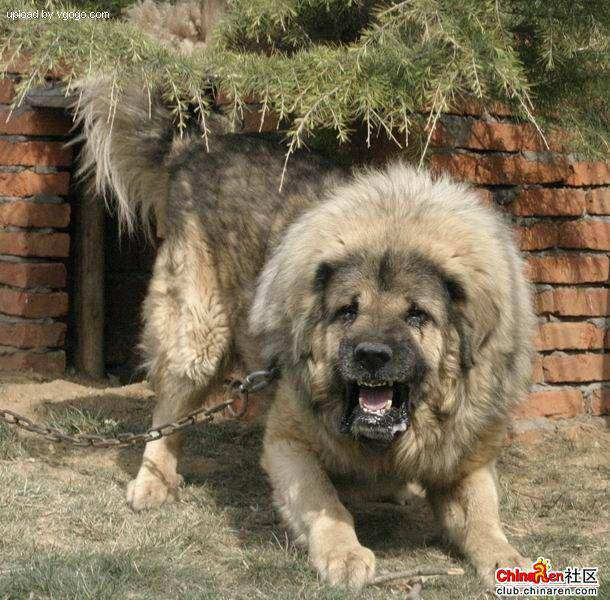

In [12]:
# Another check
Image(filenames[9000])

In [13]:
labels_csv["breed"][9000]

'tibetan_mastiff'

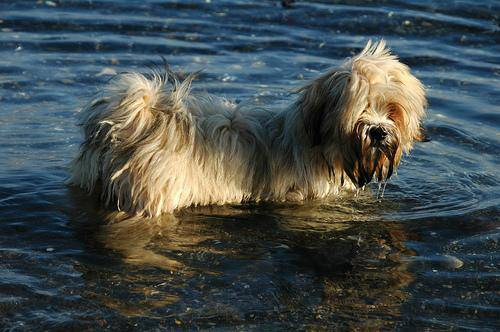

In [14]:
Image(filenames[1981])

We have now got the training image filepaths in a list, we will now prepare the labels.

In [15]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)

labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [16]:
len(labels)

10222

In [17]:
# Same result but a different way 

In [18]:
import numpy as np
labels = labels_csv["breed"].to_numpy()

labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [19]:
# See if number of labels matches the number of filenames

if len(labels) == len(filenames):
  print("A Ok")
else:
  print("Error")

A Ok


Find the unique label values

In [20]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [21]:
len(unique_breeds)

120

In [22]:
# Turn a single label into an array of booleans

print(labels[0])
labels[0] == unique_breeds


boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [23]:
# Turn every label into a boolean array

boolean_labels = [label == unique_breeds for label in labels]

boolean_labels[:2]


[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [24]:
# Example: Turning boolean array into integers

print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int)) # There will be a 1 where the sample occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [25]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set.

Because the dataset from kaggle does not come with a validation set, we wil create our own.

In [26]:
# Setup X & y variables

X = filenames
y = boolean_labels

We will start off experimenting with ~1000 images and increase as needed.

In [27]:
# Set number of images to use for experimenting

NUM_IMAGES = 1000 #@param {type:"slider", min: 1000, max: 10000}

In [28]:
# Split the data into train and validation sets

from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [29]:
# Looking at the training set

X_train[:5], y_train[:2]

(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

## Preprocessing Images (turning images into Tensors).

To preprocess our images into Tensors we will write a function which does a few things:
1. Take an image filepath as input.
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors.
4. Normalize our `image` (convert colour channels from 0-255 to 0-1). 
5. Resize the `image` to be a shape of (224 x 224).
6. Return the modified `image`. 





Before we do, we will show what importing an image looks like.

In [30]:
from matplotlib.pyplot import imread

image = imread(filenames[42])
image.shape

(257, 350, 3)

In [31]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

### Turn image into a Tensor

In [32]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [33]:
# Define image size

IMG_SIZE = 224

### Create a function for preprocessing images

In [34]:
def process_image(image_path):
  """
  Takes an image filepath and turns into a Tensor.

  """
  # read in an image path
  image = tf.io.read_file(image_path)

  # turn the jpg image into numerical Tensors with 3 colour channels (rgb)
  image = tf.image.decode_jpeg(image, channels=3)

  # convert the colour channels from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # resize the image to our desired value (244, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches


Why we turn our data into batches?

If you try to process 10,000+ images in one go... they all might not fit into memory.

So that is why we do around 32  (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this:

 `(image, label)`

### Create a function to return a tuple (image, label)

In [35]:
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label, 
  processes the image and returns a tuple of (image, label) 
  """
  image = process_image(image_path)
  return image, label

### Testing the function

In [36]:
process_image(X[42]), tf.constant(y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we have a way to turn our data into tuples of Tensors in the form: `(image, form)`. We will make a function to turn our data `(X & y)` into batches.

In [37]:
# Define the batch size, 32 is a good start and the default in TensorFlow

BATCH_SIZE = 32

# Create a function to turn data into batches

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels)
  """

  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only filepaths no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it.
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepaths
                                              tf.constant(y))) #labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors 
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepaths
                                              tf.constant(y))) #labels

    # Shuffling pathnames and label before mapping image processor function 
    # is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image,label) tuples (thisalso turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches 
    data_batch = data.batch(BATCH_SIZE)

    return data_batch 


In [38]:
# Create training and validataion data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [39]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualising data batches

Our data is now in batches, however these can be hard to understand / comprehend so we will create a function to visualise them.

In [40]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch

def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch
  """

  #Set up the figure
  plt.figure(figsize=(10, 10))

  #Loop through 25 (for displaying 25 images)
  for i in range(25):
    #(Create subplots (5 rows, 5 columns))
    ax = plt.subplot(5, 5, i+1)

    # Display an image
    plt.imshow(images[i])

    # Add the image label as title
    plt.title(unique_breeds[labels[i].argmax()])
    
    # Turn the grid lines off
    plt.axis('off')

In [41]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.410844  , 0.57063013, 0.3131724 ],
          [0.42541847, 0.5807924 , 0.3106177 ],
          [0.42361644, 0.5831665 , 0.28179976],
          ...,
          [0.5379392 , 0.59376675, 0.33808905],
          [0.5129601 , 0.5673206 , 0.31384352],
          [0.49579462, 0.5517299 , 0.2958907 ]],
 
         [[0.48772764, 0.6375802 , 0.36089078],
          [0.48397872, 0.6342326 , 0.34231412],
          [0.5214653 , 0.67478114, 0.3556057 ],
          ...,
          [0.4437652 , 0.54977715, 0.26094818],
          [0.5776644 , 0.68331486, 0.39603803],
          [0.5052287 , 0.6112672 , 0.32232437]],
 
         [[0.42414978, 0.557168  , 0.2539467 ],
          [0.51294625, 0.649886  , 0.33481243],
          [0.5164799 , 0.65589106, 0.320705  ],
          ...,
          [0.4558775 , 0.6014804 , 0.28352082],
          [0.5237773 , 0.6682852 , 0.35380197],
          [0.4454435 , 0.5911268 , 0.2729121 ]],
 
         ...,
 
         [[0.46505442, 0.46050262, 0.27321264],
          [0.46404

In [42]:
len(train_images), len(train_labels)

(32, 32)

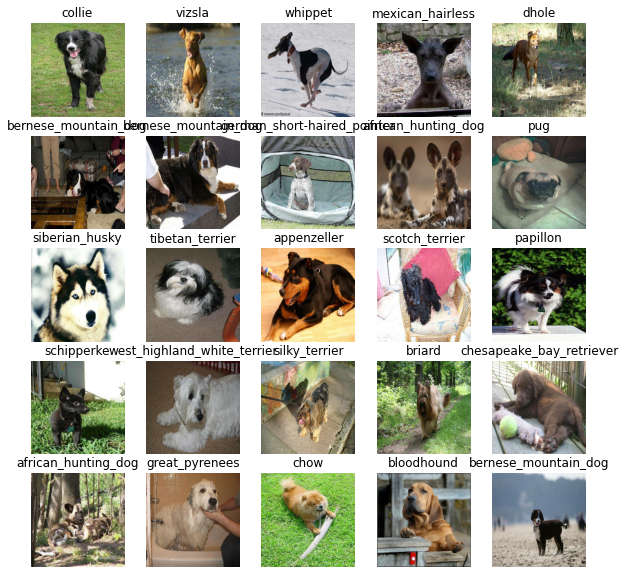

In [43]:
# Now lets visualise the data in a training batch

show_25_images(train_images, train_labels)

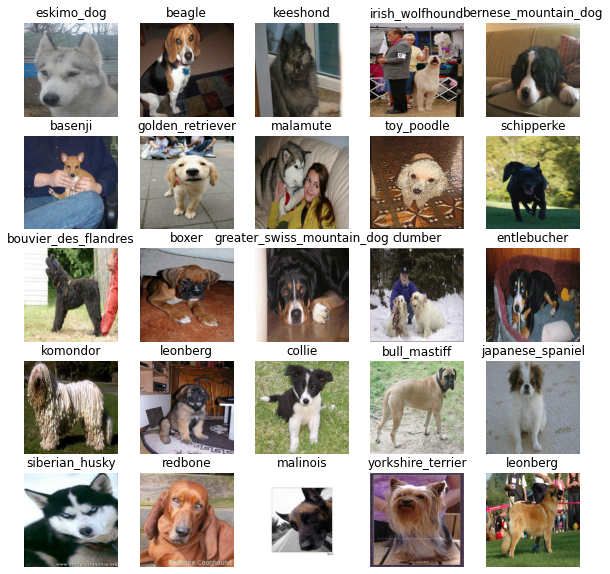

In [44]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

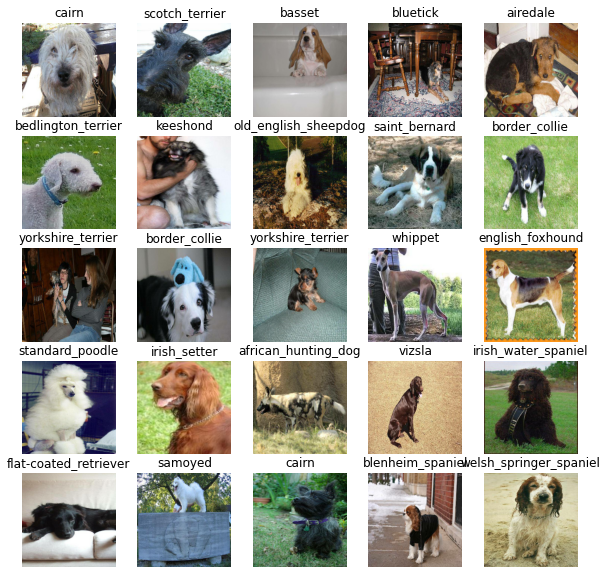

In [45]:
# Now visualise the validataion batch 

val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

Before we build a model, there is a few things we should define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from TensorFlow Hub -
https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4.

In [46]:
# Setup input shape to the model 

INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Batch, Height, Width, Colour channels

# Setup output shape of our model

OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"